In [1]:
# ECGR 4105 HW1: Test/Train split and input normalization
# Author: Lucas Therrien
# Student ID #801122089
# GitHub Link: https://github.com/lucastherrien/ECGR4105HW1

In [ ]:
##_________________________________________##
## Setup
##_________________________________________##

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [7]:
# Import dataset

hd = pd.read_csv('Housing.csv')
hd.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
# Gradient Descent and Loss functions

def compute_loss(X, y, theta): 
    preds = X.dot(theta)
    errors = np.subtract(preds, y)
    sqrErrors = np.square(errors)
    loss = 1 / (2 * samples) * np.sum(sqrErrors)
    return loss

def gradient_descent(X, y, theta, lr, iterations): 
    history = np.zeros(iterations) 
    for i in range(iterations): 
        preds = X.dot(theta) #samples x 1 
        errors = np.subtract(preds, y)  #samples x 1
        sum_delta = (lr / samples) * X.transpose().dot(errors); #(variables+1) x 1
        theta = theta - sum_delta; #(variables+1) x 1
        history[i] = compute_loss(X, y, theta) 
 
    return theta, history

def gradient_descent_with_validation(X, y, Xval, Yval, theta, lr, iterations): 
    history = np.zeros(iterations) 
    val_history = np.zeros(iterations)
    for i in range(iterations): 
        preds = X.dot(theta) #samples x 1 
        errors = np.subtract(preds, y)  #samples x 1
        sum_delta = (lr / samples) * X.transpose().dot(errors); #(variables+1) x 1
        theta = theta - sum_delta; #(variables+1) x 1
        history[i] = compute_loss(X, y, theta) 
        val_history[i] = compute_loss(Xval, Yval, theta)

    return theta, history, val_history

In [ ]:
##_________________________________________##
## Problem 1
##_________________________________________##

In [9]:
# Problem 1a, multiple linear regression for housing market with parameters:
# area, bedrooms, bathrooms, stories, parking
lr = 10 ** -2; # Optimal learning rate

In [10]:
# Input variables
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
x.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [11]:
# Output variable (housing price)
y = hd[['price']]
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [12]:
# Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
y_train = y_train.values[:]
y_test = y_test.values[:]
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [13]:
x_train[0:5]
#x_train.shape

array([[1.00e+00, 3.00e+03, 3.00e+00, 2.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 4.92e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 4.04e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 6.60e+03, 3.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 5.40e+03, 4.00e+00, 2.00e+00, 2.00e+00, 2.00e+00]])

In [14]:
x_test[0:5]

array([[1.00e+00, 4.16e+03, 3.00e+00, 1.00e+00, 3.00e+00, 0.00e+00],
       [1.00e+00, 5.02e+03, 3.00e+00, 1.00e+00, 4.00e+00, 0.00e+00],
       [1.00e+00, 1.05e+04, 3.00e+00, 2.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 8.88e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 7.42e+03, 4.00e+00, 1.00e+00, 2.00e+00, 2.00e+00]])

In [15]:
y_train[0:5]
#y_train.shape

array([[5110000],
       [4403000],
       [3290000],
       [5040000],
       [5740000]], dtype=int64)

In [16]:
y_test[0:5]

array([[ 4830000],
       [ 6720000],
       [ 6615000],
       [ 7070000],
       [11410000]], dtype=int64)

In [17]:
# Train model with Gradient Descent
iters = 25
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 1a regression: ",theta)
print("training loss history for 1a regression: ", train_loss)
print("validation loss history for 1a regression: ", val_loss)

theta values for 1a regression:  [[2.52769467e+136]
 [1.52851544e+140]
 [7.58151614e+136]
 [3.35594996e+136]
 [4.69238731e+136]
 [2.02319850e+136]]
training loss history for 1a regression:  [1.06008145e+024 1.01357804e+035 9.69114637e+045 9.26601740e+056
 8.85953788e+067 8.47088972e+078 8.09929069e+089 7.74399287e+100
 7.40428118e+111 7.07947189e+122 6.76891125e+133 6.47197421e+144
 6.18806314e+155 5.91660662e+166 5.65705828e+177 5.40889576e+188
 5.17161957e+199 4.94475215e+210 4.72783691e+221 4.52043725e+232
 4.32213575e+243 4.13253330e+254 3.95124828e+265 3.77791584e+276
 3.61218710e+287]
validation loss history for 1a regression:  [2.78196595e+023 2.65992818e+034 2.54324306e+045 2.43167666e+056
 2.32500443e+067 2.22301167e+078 2.12549311e+089 2.03225247e+100
 1.94310209e+111 1.85786253e+122 1.77636225e+133 1.69843720e+144
 1.62393055e+155 1.55269234e+166 1.48457919e+177 1.41945401e+188
 1.35718573e+199 1.29764902e+210 1.24072405e+221 1.18629626e+232
 1.13425609e+243 1.08449880e+254 

very cursed image
|
V


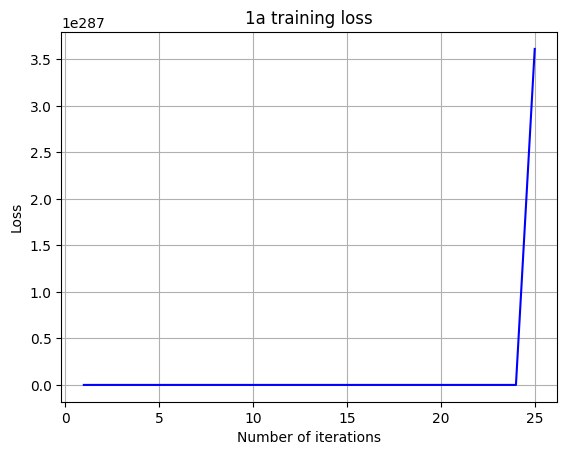

In [18]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('1a training loss') 
print("very cursed image\n|\nV")

yeah this model couldn't hit the broad side of barn
|
V


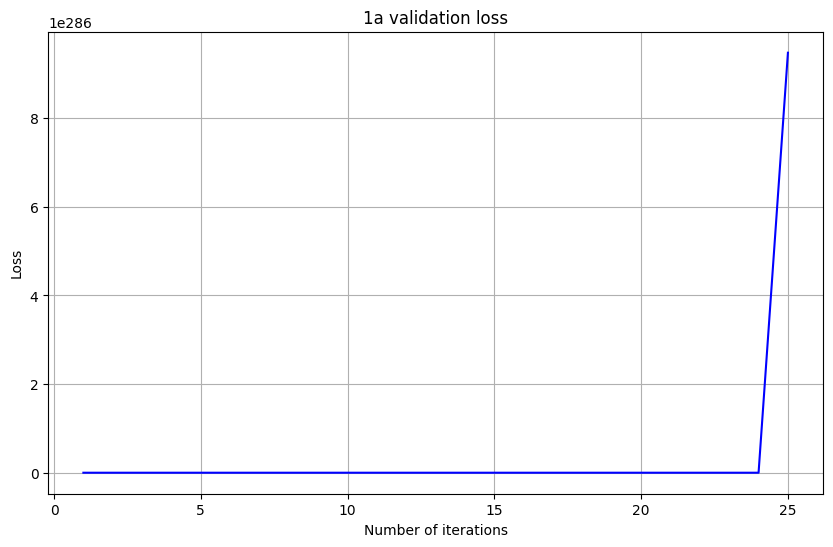

In [19]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('1a validation loss') 
print("yeah this model couldn't hit the broad side of barn\n|\nV")

In [20]:
# Problem 1b, multiple linear regression for housing market with parameters:
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, 
# hotwaterheating, airconditioning, parking, prefarea
lr = 10 ** -2; # Optimal learning rate

In [21]:
# Input variables
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x = pd.get_dummies(x,drop_first = True)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0


In [22]:
# Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
y_train = y_train.values[:]
y_test = y_test.values[:]
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [23]:
# Train model with Gradient Descent
iters = 25
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 1a regression: ",theta)
print("training loss history for 1a regression: ", train_loss)
print("validation loss history for 1a regression: ", val_loss)

theta values for 1a regression:  [[3.30538877e+136]
 [2.00665215e+140]
 [9.95384916e+136]
 [4.35943911e+136]
 [6.09002198e+136]
 [2.68203898e+136]
 [2.99660218e+136]
 [6.26609967e+135]
 [1.11801720e+136]
 [1.38082962e+135]
 [1.19837246e+136]
 [9.08914876e+135]]
training loss history for 1a regression:  [1.12872820e+024 1.10155839e+035 1.07504258e+046 1.04916504e+057
 1.02391041e+068 9.99263678e+078 9.75210227e+089 9.51735770e+100
 9.28826371e+111 9.06468428e+122 8.84648667e+133 8.63354133e+144
 8.42572184e+155 8.22290480e+166 8.02496981e+177 7.83179935e+188
 7.64327873e+199 7.45929603e+210 7.27974200e+221 7.10451005e+232
 6.93349614e+243 6.76659873e+254 6.60371874e+265 6.44475947e+276
 6.28962653e+287]
validation loss history for 1a regression:  [2.81685357e+023 2.74904810e+034 2.68287528e+045 2.61829531e+056
 2.55526987e+067 2.49376152e+078 2.43373374e+089 2.37515091e+100
 2.31797824e+111 2.26218177e+122 2.20772840e+133 2.15458578e+144
 2.10272237e+155 2.05210737e+166 2.00271073e+177 

very cursed image
|
V


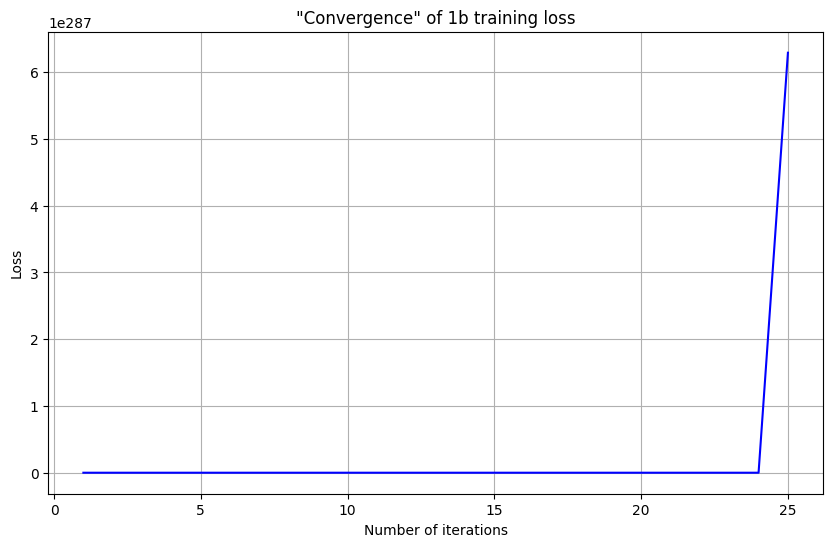

In [24]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('"Convergence" of 1b training loss') 
print("very cursed image\n|\nV")

yeah this model couldn't hit the broad side of barn
|
V


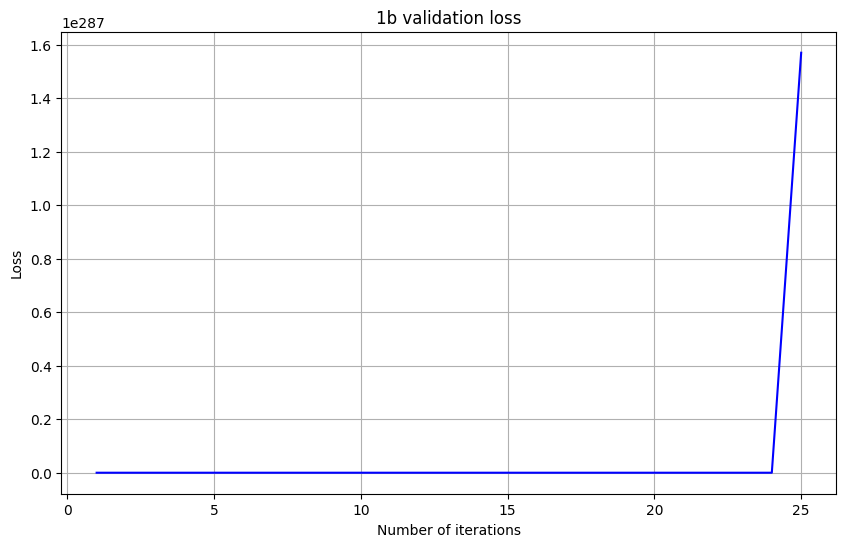

In [25]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('1b validation loss') 
print("yeah this model couldn't hit the broad side of barn\n|\nV")

In [ ]:
##_________________________________________##
## Problem 2
##_________________________________________##

In [27]:
# Problem 2a, multiple linear regression with standardization and normalization
# for housing market with parameters:
# area, bedrooms, bathrooms, stories, parking
from sklearn import preprocessing
lr = 10 ** -2; # Optimal learning rate

In [29]:
# Input variables, standized and normalized sets
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [30]:
x_std[0:5]

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  2.67940935],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013,  1.51769249]])

In [31]:
x_norm[0:5]

array([[9.99999700e-01, 5.39083396e-04, 2.69541698e-04, 4.04312547e-04,
        2.69541698e-04],
       [9.99999645e-01, 4.46428413e-04, 4.46428413e-04, 4.46428413e-04,
        3.34821310e-04],
       [9.99999894e-01, 3.01204787e-04, 2.00803192e-04, 2.00803192e-04,
        2.00803192e-04],
       [9.99999707e-01, 5.33333177e-04, 2.66666588e-04, 2.66666588e-04,
        3.99999883e-04],
       [9.99999773e-01, 5.39083436e-04, 1.34770859e-04, 2.69541718e-04,
        2.69541718e-04]])

In [32]:
# Output variable (housing price), scaled to prevent absurdly huge loss
y = hd[['price']]
standardizer = preprocessing.StandardScaler().fit(y)
y_std = standardizer.transform(y)
y_norm = preprocessing.normalize(y,axis=0)

In [33]:
y_std[0:5]

array([[4.56636513],
       [4.00448405],
       [4.00448405],
       [3.98575468],
       [3.55497918]])

In [34]:
y_norm[0:5]

array([[0.11127257],
       [0.1024879 ],
       [0.1024879 ],
       [0.10219507],
       [0.09546015]])

In [35]:
# Standardized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [36]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 2a standardized regression: ",theta)
print("training loss history for 2a standardized regression: ", train_loss)
print("validation loss history for 2a standardized regression: ", val_loss)

theta values for 2a standardized regression:  [[-0.02478977]
 [ 0.35840677]
 [ 0.03618391]
 [ 0.33298525]
 [ 0.25843847]
 [ 0.17437524]]
training loss history for 2a standardized regression:  [0.48048479 0.4704646  0.4608261  ... 0.20710351 0.20710351 0.20710351]
validation loss history for 2a standardized regression:  [0.13175172 0.12949257 0.12731721 ... 0.06832487 0.06832487 0.06832488]


Text(0.5, 1.0, '2a standardized set training loss')

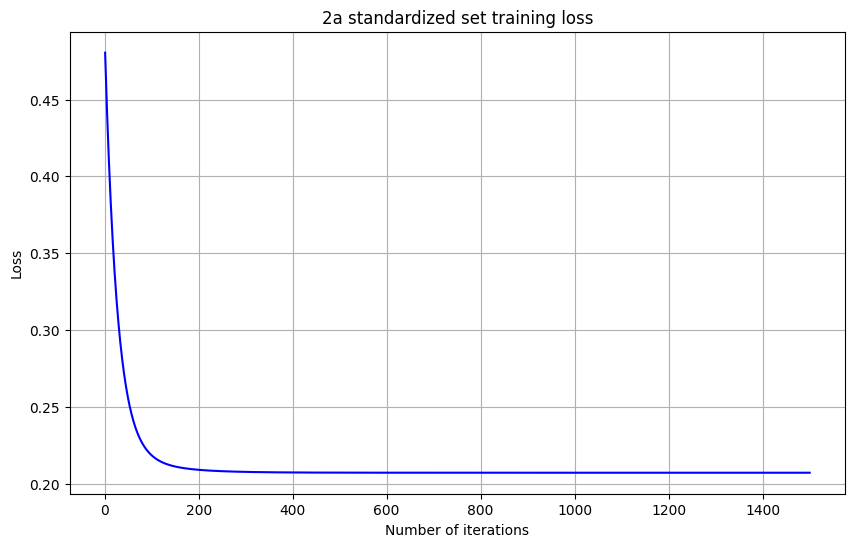

In [37]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2a standardized set training loss') 

Text(0.5, 1.0, '2a standardized set validation loss')

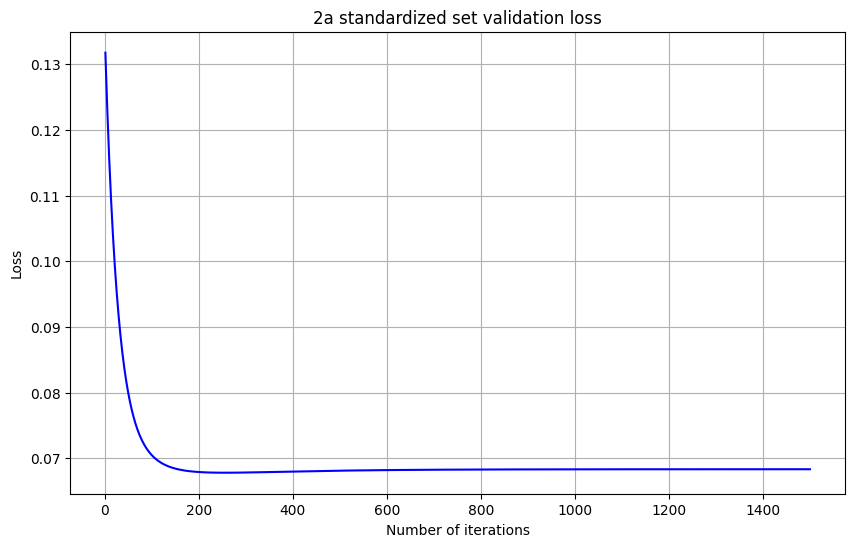

In [38]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2a standardized set validation loss') 

In [39]:
# Normalized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [40]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 2a normalized regression: ",theta)
print("training loss history for 2a normalized regression: ", train_loss)
print("validation loss history for 2a normalized regression: ", val_loss)

theta values for 2a normalized regression:  [[ 2.02847063e-02]
 [ 2.02847167e-02]
 [-6.61032283e-06]
 [ 2.73852133e-06]
 [ 3.61162529e-06]
 [ 1.07788745e-05]]
training loss history for 2a normalized regression:  [0.00091274 0.00088144 0.00085138 ... 0.00012239 0.00012239 0.00012239]
validation loss history for 2a normalized regression:  [1.94016729e-04 1.86877338e-04 1.80034095e-04 ... 3.06829614e-05
 3.06829614e-05 3.06829614e-05]


Text(0.5, 1.0, '2a normalized set training loss')

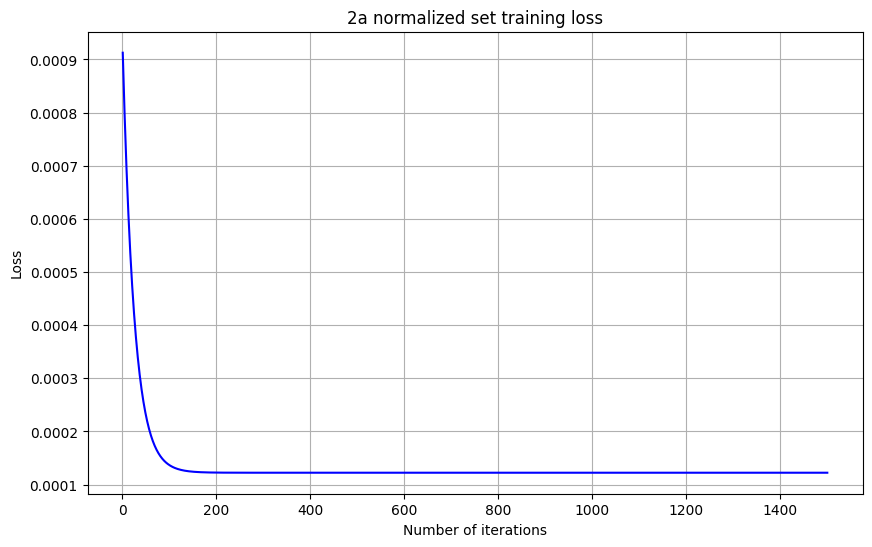

In [41]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2a normalized set training loss') 

Text(0.5, 1.0, '2a normalized set validation loss')

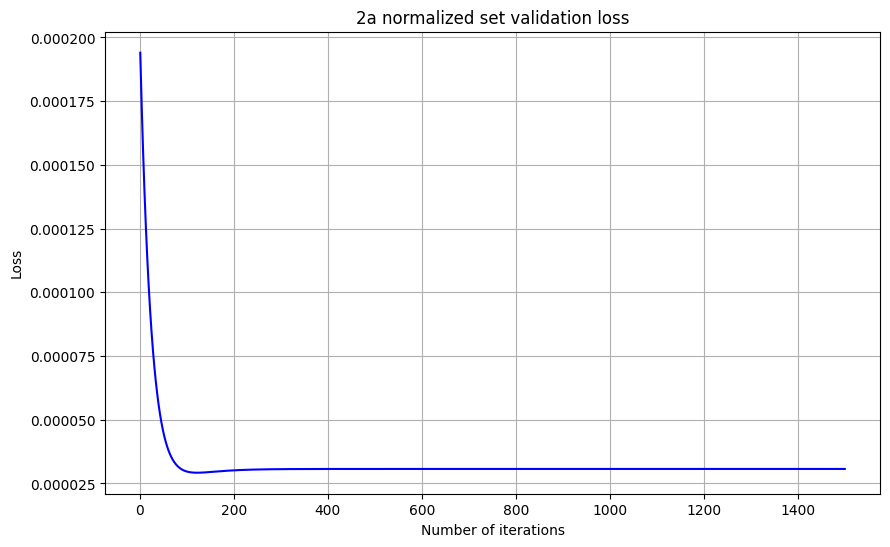

In [42]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2a normalized set validation loss') 

In [ ]:
# The normalized set appears to perform better for 2 reasons: 
# 1) it does not overfit the model as seen in the period rising loss of the standardized model
# 2) the overall validation loss over all iterations is lower by a factor of roughly 480

In [43]:
# Problem 2b, multiple linear regression with standardization and normalization
# for housing market with parameters:
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, 
# hotwaterheating, airconditioning, parking, prefarea
lr = 10 ** -2; # Optimal learning rate

In [44]:
# Input variables
x = hd[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x = pd.get_dummies(x,drop_first = True)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0


In [45]:
# Create standardized and normalized sets
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [46]:
pd.DataFrame(x_std[0:5])

,0,1,2,3,4,5,6,7,8,9,10
0,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941
1,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941
3,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941
4,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035


In [47]:
pd.DataFrame(x_norm[0:5])

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.000539,0.000270,0.000404,0.000270,0.000135,0.000000,0.000000,0.0,0.000135,0.000135
1,1.0,0.000446,0.000446,0.000446,0.000335,0.000112,0.000000,0.000000,0.0,0.000112,0.000000
2,1.0,0.000301,0.000201,0.000201,0.000201,0.000100,0.000000,0.000100,0.0,0.000000,0.000100
3,1.0,0.000533,0.000267,0.000267,0.000400,0.000133,0.000000,0.000133,0.0,0.000133,0.000133
4,1.0,0.000539,0.000135,0.000270,0.000270,0.000135,0.000135,0.000135,0.0,0.000135,0.000000


In [48]:
# Standardized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [49]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 2b standardized regression: ",theta)
print("training loss history for 2b standardized regression: ", train_loss)
print("validation loss history for 2b standardized regression: ", val_loss)

theta values for 2b standardized regression:  [[-0.01487427]
 [ 0.31532075]
 [ 0.03873683]
 [ 0.23360041]
 [ 0.22029453]
 [ 0.10986757]
 [ 0.07412671]
 [ 0.05745963]
 [ 0.10162421]
 [ 0.06541409]
 [ 0.22443671]
 [ 0.15533043]]
training loss history for 2b standardized regression:  [0.46811285 0.45362698 0.43982799 ... 0.15314584 0.15314584 0.15314584]
validation loss history for 2b standardized regression:  [0.13800461 0.13449154 0.13113325 ... 0.05395965 0.05395967 0.05395969]


Text(0.5, 1.0, '2b standardized set training loss')

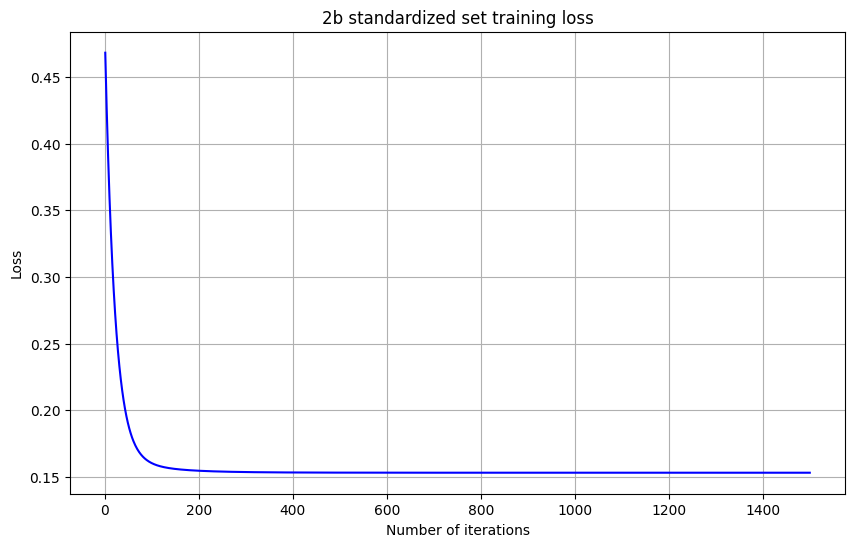

In [50]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2b standardized set training loss') 

Text(0.5, 1.0, '2b standardized set validation loss')

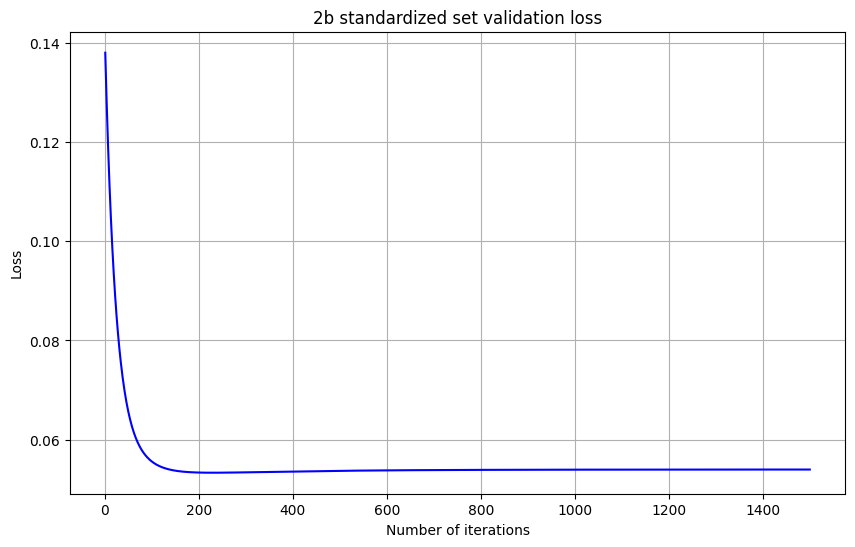

In [51]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2b standardized set validation loss') 

In [52]:
# Normalized Set, Test train split, 80 % train 20 % test
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [53]:
# Train model with Gradient Descent
iters = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iters)
print("theta values for 2b normalized regression: ",theta)
print("training loss history for 2b normalized regression: ", train_loss)
print("validation loss history for 2b normalized regression: ", val_loss)

theta values for 2b normalized regression:  [[ 1.98597442e-02]
 [ 1.98597540e-02]
 [-6.41417528e-06]
 [ 2.40969551e-06]
 [ 4.83200984e-06]
 [ 1.16611677e-05]
 [-4.70883040e-09]
 [ 3.82647604e-06]
 [ 1.76598618e-06]
 [ 8.99826070e-07]
 [ 7.81119361e-06]
 [ 3.98850321e-06]]
training loss history for 2b normalized regression:  [0.00087849 0.00084849 0.00081967 ... 0.0001209  0.0001209  0.0001209 ]
validation loss history for 2b normalized regression:  [2.29096498e-04 2.21440080e-04 2.14083791e-04 ... 3.18830356e-05
 3.18830356e-05 3.18830356e-05]


Text(0.5, 1.0, '2b normalized set training loss')

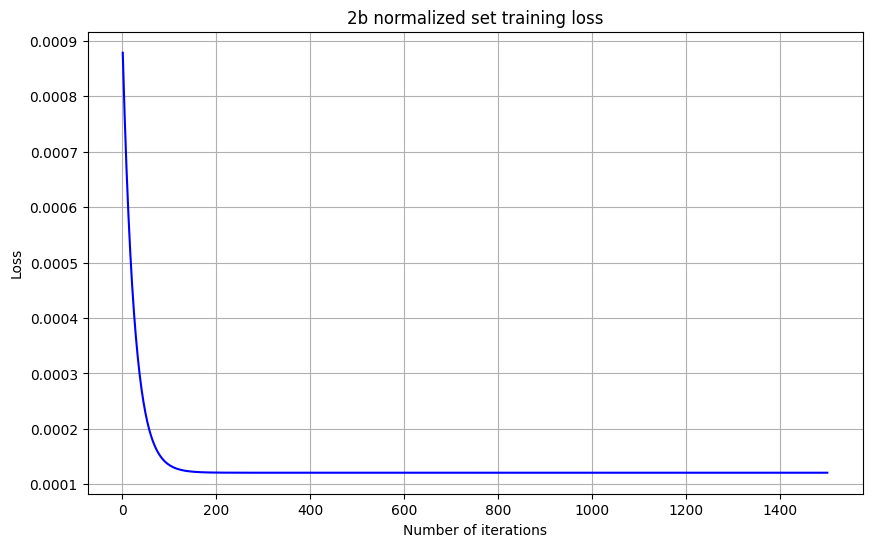

In [54]:
plt.plot(range(1, iters + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2b normalized set training loss') 

Text(0.5, 1.0, '2b normalized set validation loss')

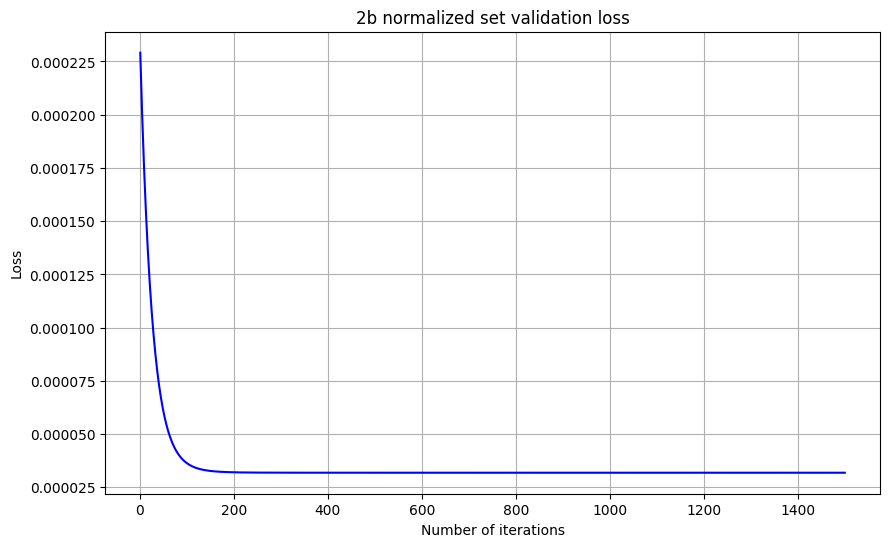

In [55]:
plt.plot(range(1, iters + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss') 
plt.title('2b normalized set validation loss')